In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10392188435764699777
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 12292388283477965956
physical_device_desc: "device: XLA_CPU device"
]


In [3]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import TensorBoard
from time import time
np.random.seed(7)
dataset = np.loadtxt("datasets/pima-indians-diabetes.csv", delimiter=",")

X = dataset[:,0:8]
Y = dataset[:,8]
#print(X)
#print(Y)

Using TensorFlow backend.


In [4]:
# create model
seed = 0
np.random.seed(seed)
model = Sequential()
model.add(Dense(20, input_dim=8, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [5]:
# Compile model
tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
print("FITTING")
history = model.fit(X, Y, epochs=120,batch_size=20,validation_split=0.20,verbose=2,callbacks=[tensorboard])
print("END FITTING")


FITTING
Train on 614 samples, validate on 154 samples
Epoch 1/120
 - 0s - loss: 14.6398 - accuracy: 0.5179 - val_loss: 7.4203 - val_accuracy: 0.5130
Epoch 2/120
 - 0s - loss: 7.8601 - accuracy: 0.3958 - val_loss: 3.4474 - val_accuracy: 0.4156
Epoch 3/120
 - 0s - loss: 3.8745 - accuracy: 0.4528 - val_loss: 2.2167 - val_accuracy: 0.5260
Epoch 4/120
 - 0s - loss: 2.1649 - accuracy: 0.5945 - val_loss: 1.3961 - val_accuracy: 0.5649
Epoch 5/120
 - 0s - loss: 1.3169 - accuracy: 0.6336 - val_loss: 0.9669 - val_accuracy: 0.6169
Epoch 6/120
 - 0s - loss: 1.0958 - accuracy: 0.6498 - val_loss: 0.8159 - val_accuracy: 0.6234
Epoch 7/120
 - 0s - loss: 0.9940 - accuracy: 0.6547 - val_loss: 0.7926 - val_accuracy: 0.6299
Epoch 8/120
 - 0s - loss: 0.9544 - accuracy: 0.6531 - val_loss: 0.7467 - val_accuracy: 0.6364
Epoch 9/120
 - 0s - loss: 0.7463 - accuracy: 0.6726 - val_loss: 0.7233 - val_accuracy: 0.6299
Epoch 10/120
 - 0s - loss: 0.7957 - accuracy: 0.6433 - val_loss: 0.6820 - val_accuracy: 0.6364
Epoc

Epoch 87/120
 - 0s - loss: 0.6461 - accuracy: 0.6547 - val_loss: 0.6519 - val_accuracy: 0.6429
Epoch 88/120
 - 0s - loss: 0.6403 - accuracy: 0.6596 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 89/120
 - 0s - loss: 0.6485 - accuracy: 0.6531 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 90/120
 - 0s - loss: 0.6453 - accuracy: 0.6531 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 91/120
 - 0s - loss: 0.6456 - accuracy: 0.6515 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 92/120
 - 0s - loss: 0.6455 - accuracy: 0.6531 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 93/120
 - 0s - loss: 0.6455 - accuracy: 0.6515 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 94/120
 - 0s - loss: 0.6475 - accuracy: 0.6515 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 95/120
 - 0s - loss: 0.6510 - accuracy: 0.6547 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 96/120
 - 0s - loss: 0.6440 - accuracy: 0.6547 - val_loss: 0.6520 - val_accuracy: 0.6429
Epoch 97/120
 - 0s - loss: 0.6433 - accuracy: 0.65

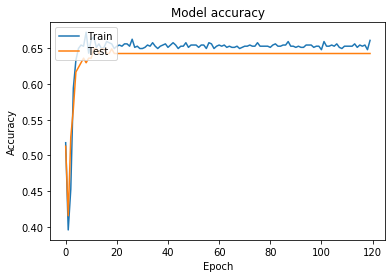

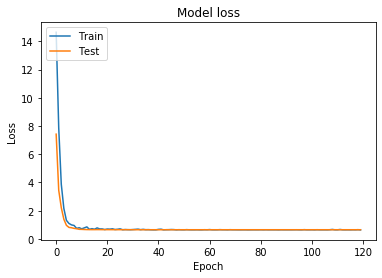

In [9]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [5]:
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
predictions = model.predict(X)
# round predictions
for a,b in zip(X,predictions):
   print(a,round(b[0]))

768/768 [==============================] - 0s 29us/step

acc: 68.10%
[  6.    148.     72.     35.      0.     33.6     0.627  50.   ] 0.0
[ 1.    85.    66.    29.     0.    26.6    0.351 31.   ] 0.0
[  8.    183.     64.      0.      0.     23.3     0.672  32.   ] 0.0
[ 1.    89.    66.    23.    94.    28.1    0.167 21.   ] 0.0
[  0.    137.     40.     35.    168.     43.1     2.288  33.   ] 0.0
[  5.    116.     74.      0.      0.     25.6     0.201  30.   ] 0.0
[ 3.    78.    50.    32.    88.    31.     0.248 26.   ] 0.0
[ 10.    115.      0.      0.      0.     35.3     0.134  29.   ] 1.0
[2.00e+00 1.97e+02 7.00e+01 4.50e+01 5.43e+02 3.05e+01 1.58e-01 5.30e+01] 1.0
[  8.    125.     96.      0.      0.      0.      0.232  54.   ] 0.0
[  4.    110.     92.      0.      0.     37.6     0.191  30.   ] 0.0
[ 10.    168.     74.      0.      0.     38.      0.537  34.   ] 0.0
[ 10.    139.     80.      0.      0.     27.1     1.441  57.   ] 0.0
[1.00e+00 1.89e+02 6.00e+01 2.30e+01 